In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score

X_pca = np.load('../data/processed_data/pca_2d.npy')
X_tsne = np.load('../data/processed_data/tsne_2d.npy')
X_umap = np.load('../data/processed_data/umap_2d.npy')

X_pca.shape, X_tsne.shape, X_umap.shape


((20491, 2), (20491, 2), (20491, 2))

In [8]:
print("UMAP shape:", X_umap.shape)
print("PCA shape:", X_pca.shape)
print("t-SNE shape:", X_tsne.shape)

UMAP shape: (20491, 2)
PCA shape: (20491, 2)
t-SNE shape: (20491, 2)


### Elbow Methode using UMAP 2D

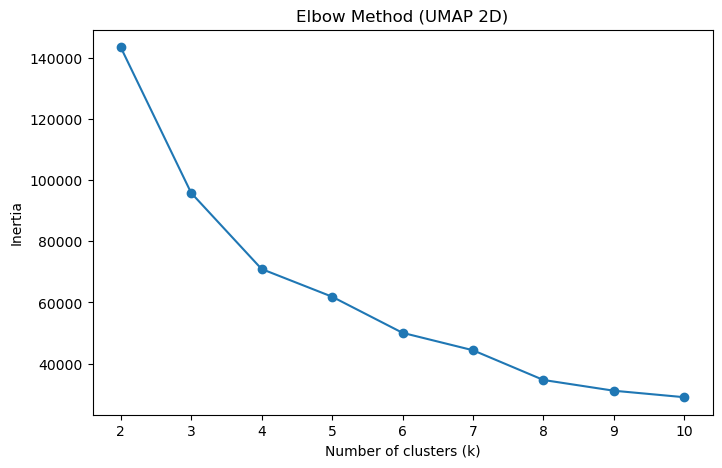

In [9]:
inertias = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_umap)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K_range, inertias, marker='o')
plt.title("Elbow Method (UMAP 2D)")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.show()


### Silhouette Scores

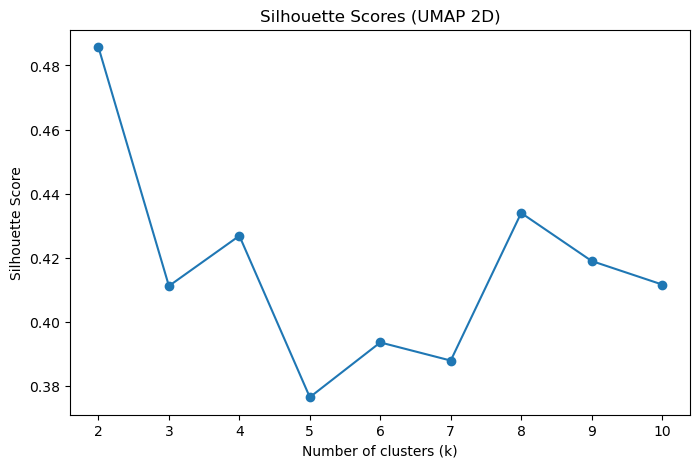

[0.4856906533241272,
 0.4111896753311157,
 0.4268534183502197,
 0.3764823079109192,
 0.39357948303222656,
 0.38791897892951965,
 0.43397462368011475,
 0.4189892113208771,
 0.4116511940956116]

In [10]:
sil_scores = []

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_umap)
    sil = silhouette_score(X_umap, labels)
    sil_scores.append(sil)

plt.figure(figsize=(8,5))
plt.plot(K_range, sil_scores, marker='o')
plt.title("Silhouette Scores (UMAP 2D)")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.show()

sil_scores


In [11]:
k = 4 

kmeans = KMeans(n_clusters=k, random_state=42)
cluster_labels = kmeans.fit_predict(X_umap)

cluster_labels[:20]


array([2, 2, 2, 2, 2, 3, 2, 0, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2],
      dtype=int32)

### 2D UMAP

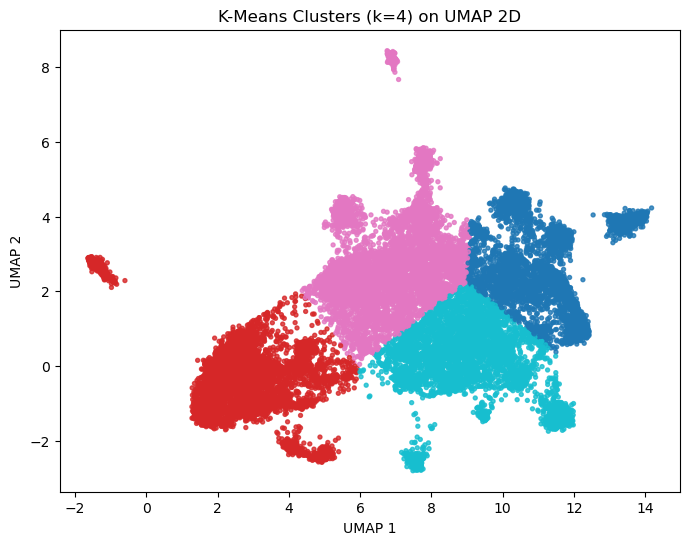

In [12]:
plt.figure(figsize=(8,6))
plt.scatter(
    X_umap[:, 0],
    X_umap[:, 1],
    c=cluster_labels,
    cmap='tab10',
    s=8,
    alpha=0.8
)
plt.title("K-Means Clusters (k=4) on UMAP 2D")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.show()


### 2D PCA

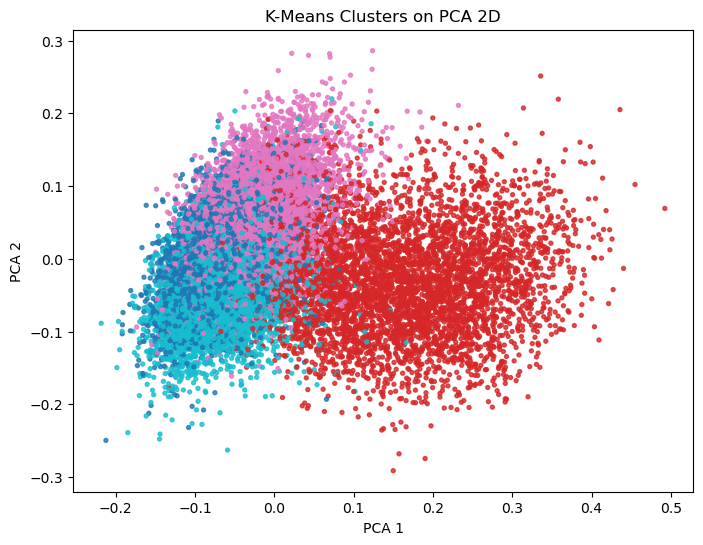

In [13]:
plt.figure(figsize=(8,6))
plt.scatter(
    X_pca[:, 0],
    X_pca[:, 1],
    c=cluster_labels,
    cmap='tab10',
    s=8,
    alpha=0.8
)
plt.title("K-Means Clusters on PCA 2D")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()


### 2d t-SNE

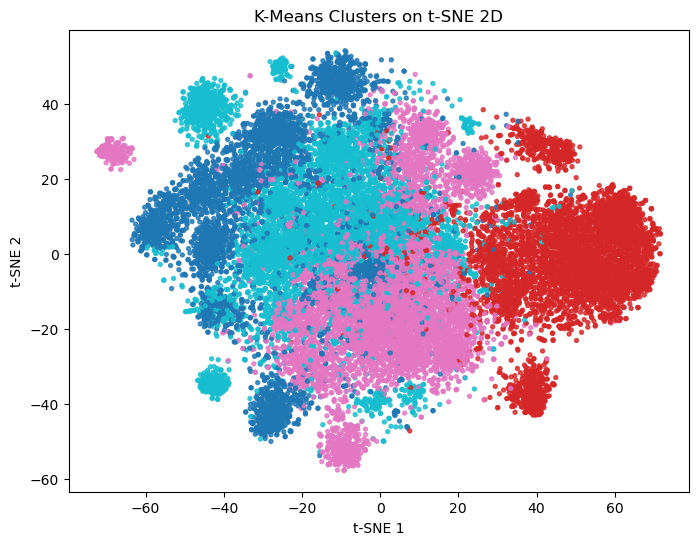

In [14]:
plt.figure(figsize=(8,6))
plt.scatter(
    X_tsne[:, 0],
    X_tsne[:, 1],
    c=cluster_labels,
    cmap='tab10',
    s=8,
    alpha=0.8
)
plt.title("K-Means Clusters on t-SNE 2D")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.show()


In [15]:
df = pd.read_csv('../data/processed_data/cleaned_reviews.csv')

df['cluster'] = cluster_labels

df.head()

,Review,Rating,Review_clean,Review_tokens,Review_filtered,Review_lemmatized,Cleaned_Review,Review_word_count,cluster
0,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...,"['nice', 'hotel', 'expensive', 'parking', 'got...","['nice', 'hotel', 'expensive', 'parking', 'got...","['nice', 'hotel', 'expensive', 'parking', 'get...",nice hotel expensive parking get good deal sta...,80,2
1,ok nothing special charge diamond member hilto...,2,ok nothing special charge diamond member hilto...,"['ok', 'nothing', 'special', 'charge', 'diamon...","['ok', 'nothing', 'special', 'charge', 'diamon...","['ok', 'nothing', 'special', 'charge', 'diamon...",ok nothing special charge diamond member hilto...,230,2
2,nice rooms not 4* experience hotel monaco seat...,3,nice rooms not experience hotel monaco seattl...,"['nice', 'rooms', 'not', 'experience', 'hotel'...","['nice', 'rooms', 'experience', 'hotel', 'mona...","['nice', 'room', 'experience', 'hotel', 'monac...",nice room experience hotel monaco seattle good...,199,2
3,"unique, great stay, wonderful time hotel monac...",5,unique great stay wonderful time hotel monaco ...,"['unique', 'great', 'stay', 'wonderful', 'time...","['unique', 'great', 'stay', 'wonderful', 'time...","['unique', 'great', 'stay', 'wonderful', 'time...",unique great stay wonderful time hotel monaco ...,85,2
4,"great stay great stay, went seahawk game aweso...",5,great stay great stay went seahawk game awesom...,"['great', 'stay', 'great', 'stay', 'went', 'se...","['great', 'stay', 'great', 'stay', 'went', 'se...","['great', 'stay', 'great', 'stay', 'go', 'seah...",great stay great stay go seahawk game awesome ...,178,2


In [16]:
for c in range(k):
    print(f"\n===== Cluster {c} =====")
    display(df[df['cluster'] == c].sample(5, random_state=42)[['Cleaned_Review']])



===== Cluster 0 =====


,Cleaned_Review
1688,expectation house power outage decide spend ni...
19903,wonderful experience wife wonderful night vill...
8647,great location easy centraal station minute wa...
13615,perfect book nice pricethe hotelroom good clea...
8744,krasnapolsky fine conference hold grand hotel ...



===== Cluster 1 =====


,Cleaned_Review
3577,good chain resort tool website look informatio...
16465,paradise stay great staff friendly speak engli...
3478,wonderful time want thank trip advisor informa...
6849,beautiful friendly husband stay excellence nig...
3840,overall great vacation wife yo daughter great ...



===== Cluster 2 =====


,Cleaned_Review
18031,fall hell location convinient hotel location b...
7658,great location avoid th floor stay night th fe...
19697,nice perfect stay night experience limited pos...
14939,nice modern hotel hotel jazz good location cle...
4253,ok dwarf stay holiday inn march rooms smallest...



===== Cluster 3 =====


,Cleaned_Review
7418,hotel le suck agree rest poor review hotel rec...
7260,return visit return visit enjoy stay room comf...
16207,faultless great location great service stay we...
4898,delightful stay teenage daughter return lovely...
11918,location location location family stay deluxe ...


In [17]:
from collections import Counter

def top_words(texts, n=15):
    all_words = " ".join(texts).split()
    return Counter(all_words).most_common(n)

for c in range(k):
    cluster_texts = df[df['cluster'] == c]['Cleaned_Review'].tolist()
    print(f"\n=== Top words for Cluster {c} ===")
    print(top_words(cluster_texts, 15))



=== Top words for Cluster 0 ===
[('hotel', 13460), ('room', 8178), ('stay', 5554), ('good', 4565), ('great', 4268), ('location', 3263), ('staff', 3124), ('walk', 3075), ('breakfast', 2759), ('not', 2698), ('night', 2621), ('clean', 2520), ('nice', 2077), ('day', 1808), ('minute', 1765)]

=== Top words for Cluster 1 ===
[('room', 12111), ('not', 10082), ('beach', 9367), ('hotel', 8914), ('resort', 8710), ('good', 8621), ('great', 7280), ('day', 6716), ('food', 6508), ('pool', 6371), ('time', 6204), ('stay', 6197), ('restaurant', 5023), ('go', 4948), ('nice', 4887)]

=== Top words for Cluster 2 ===
[('room', 18201), ('hotel', 17394), ('stay', 8773), ('not', 6191), ('good', 4767), ('night', 4744), ('great', 4261), ('staff', 4162), ('nice', 3855), ('service', 3473), ('bed', 3412), ('location', 3123), ('day', 3005), ('breakfast', 2946), ('time', 2864)]

=== Top words for Cluster 3 ===
[('hotel', 12963), ('room', 7818), ('stay', 6819), ('great', 5428), ('staff', 4186), ('location', 3929), (

In [18]:
# Map cluster numbers to descriptive names
cluster_names = {
    0: "General Positive Experience (Rooms & Location)",
    1: "Resort & Holiday Activities",
    2: "Room Comfort & Sleep Quality",
    3: "Service & Cleanliness Feedback (Mixed Sentiment)"
}

df["cluster_name"] = df["cluster"].map(cluster_names)

df[["Cleaned_Review", "cluster", "cluster_name"]].head()


,Cleaned_Review,cluster,cluster_name
0,nice hotel expensive parking get good deal sta...,2,Room Comfort & Sleep Quality
1,ok nothing special charge diamond member hilto...,2,Room Comfort & Sleep Quality
2,nice room experience hotel monaco seattle good...,2,Room Comfort & Sleep Quality
3,unique great stay wonderful time hotel monaco ...,2,Room Comfort & Sleep Quality
4,great stay great stay go seahawk game awesome ...,2,Room Comfort & Sleep Quality


In [19]:
df["cluster_name"].value_counts()


cluster_name
Room Comfort & Sleep Quality                        6047
Service & Cleanliness Feedback (Mixed Sentiment)    5162
Resort & Holiday Activities                         4980
General Positive Experience (Rooms & Location)      4302
Name: count, dtype: int64

In [20]:
for c in cluster_names.keys():
    print(f"\n===== {cluster_names[c]} =====")
    display(df[df["cluster"] == c].sample(5, random_state=42)[["Cleaned_Review"]])



===== General Positive Experience (Rooms & Location) =====


,Cleaned_Review
1688,expectation house power outage decide spend ni...
19903,wonderful experience wife wonderful night vill...
8647,great location easy centraal station minute wa...
13615,perfect book nice pricethe hotelroom good clea...
8744,krasnapolsky fine conference hold grand hotel ...



===== Resort & Holiday Activities =====


,Cleaned_Review
3577,good chain resort tool website look informatio...
16465,paradise stay great staff friendly speak engli...
3478,wonderful time want thank trip advisor informa...
6849,beautiful friendly husband stay excellence nig...
3840,overall great vacation wife yo daughter great ...



===== Room Comfort & Sleep Quality =====


,Cleaned_Review
18031,fall hell location convinient hotel location b...
7658,great location avoid th floor stay night th fe...
19697,nice perfect stay night experience limited pos...
14939,nice modern hotel hotel jazz good location cle...
4253,ok dwarf stay holiday inn march rooms smallest...



===== Service & Cleanliness Feedback (Mixed Sentiment) =====


,Cleaned_Review
7418,hotel le suck agree rest poor review hotel rec...
7260,return visit return visit enjoy stay room comf...
16207,faultless great location great service stay we...
4898,delightful stay teenage daughter return lovely...
11918,location location location family stay deluxe ...


In [21]:
for c in cluster_names.keys():
    cluster_texts = df[df["cluster"] == c]["Cleaned_Review"].tolist()
    print(f"\n=== Top words for: {cluster_names[c]} ===")
    print(top_words(cluster_texts, 15))



=== Top words for: General Positive Experience (Rooms & Location) ===
[('hotel', 13460), ('room', 8178), ('stay', 5554), ('good', 4565), ('great', 4268), ('location', 3263), ('staff', 3124), ('walk', 3075), ('breakfast', 2759), ('not', 2698), ('night', 2621), ('clean', 2520), ('nice', 2077), ('day', 1808), ('minute', 1765)]

=== Top words for: Resort & Holiday Activities ===
[('room', 12111), ('not', 10082), ('beach', 9367), ('hotel', 8914), ('resort', 8710), ('good', 8621), ('great', 7280), ('day', 6716), ('food', 6508), ('pool', 6371), ('time', 6204), ('stay', 6197), ('restaurant', 5023), ('go', 4948), ('nice', 4887)]

=== Top words for: Room Comfort & Sleep Quality ===
[('room', 18201), ('hotel', 17394), ('stay', 8773), ('not', 6191), ('good', 4767), ('night', 4744), ('great', 4261), ('staff', 4162), ('nice', 3855), ('service', 3473), ('bed', 3412), ('location', 3123), ('day', 3005), ('breakfast', 2946), ('time', 2864)]

=== Top words for: Service & Cleanliness Feedback (Mixed Sent

In [23]:
df.to_csv("../data/processed_data/reviews_with_clusters.csv", index=False)
